In [192]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    rand = np.random.RandomState(seed)
    x1 = rand.normal(mu1, sigma1, n_samples)
    x2 = rand.normal(mu2, sigma2, n_samples)
    y = np.full(n_samples, target)
    return x1, x2, y


def random_weights(n_features, seed):
    rand = np.random.RandomState(seed)
    return rand.normal(loc=0.0, scale=0.01, size=1 + n_features)


def plot_dataset(X, y, weights):
    plt.scatter(X[y == 1, 1], X[y == 1, 2], color="red", marker="o", label="class 1")
    plt.scatter(
        X[y == -1, 1], X[y == -1, 2], color="blue", marker="x", label="class -1"
    )
    plt.legend(loc="upper left")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Perceptron")
    # Calculate the intercept and slope for the decision boundary line
    intercept = -weights[0] / weights[2]
    slope = -weights[1] / weights[2]

    # Define the range of x values within the data points
    x1_min = np.min(X[:, 1])
    x1_max = np.max(X[:, 1])
    x = np.linspace(x1_min, x1_max, 100)

    # Compute the corresponding y values for the decision boundary
    y_boundary = intercept + slope * x

    # Plot the decision boundary within the data range
    plt.plot(x, y_boundary, color="black")

    # Display the plot
    plt.show()

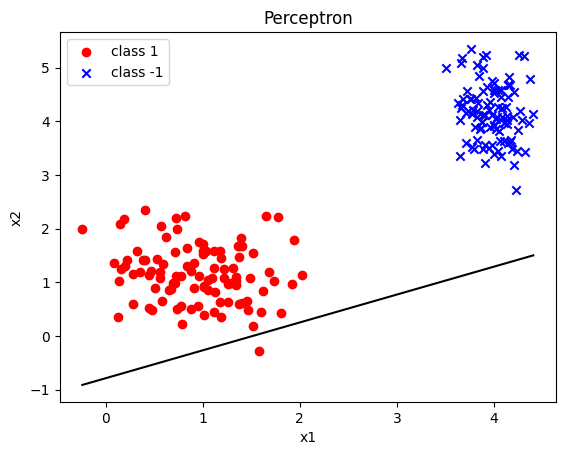

[ 0.00915507 -0.00603542  0.01162295]


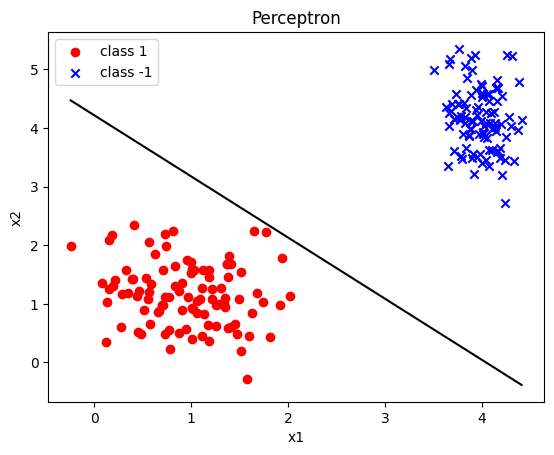

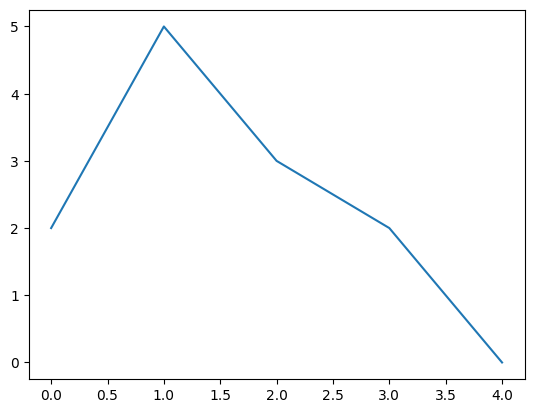

In [193]:
n_samples = 100
x11, x12, y1 = generate_data(1, 0.5, 1.2, 0.5, n_samples, 1, 100)
x21, x22, y2 = generate_data(4, 0.2, 4.2, 0.5, n_samples, -1, 100)
x0 = np.ones(n_samples * 2)

X = np.stack((x0, np.concatenate((x11, x21)), np.concatenate((x12, x22))), axis=1)
y = np.concatenate([y1, y2])

weights = random_weights(2, seed=69)

plot_dataset(X, y, weights)


def train(X, Y):
    num_errors = 0
    num_epochs = 0
    total_errors = []
    w = random_weights(2, seed=69)
    print(w)

    while True:
        num_epochs += 1
        for i in range(Y.shape[0]):
            x = X[i, :]
            y = Y[i]
            if np.dot(w, x) * y < 0:
                num_errors += 1
                w = w + y * x
        total_errors.append(num_errors)

        if num_errors == 0:
            break
        else:
            num_errors = 0
    return w, total_errors


w, total_errors = train(X, y)

plot_dataset(X, y, w)


plt.plot(range(len(total_errors)), total_errors)
